In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dense, Embedding, LSTM,Bidirectional, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pydot
import pandas as pd
import numpy as np
import string, re
import itertools
import nltk
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
py.init_notebook_mode(connected=True)
%matplotlib inline

In [ ]:
#train = pd.read_csv('/content/train_dataset - ta-misogyny-train.csv', usecols=['Category','Text'])

#val = pd.read_csv('/content/Validation_set - Sheet1 (1).csv', usecols=['Category','Text'])

#test = pd.read_csv('/content/ta-misogyny_test-dev - ta-misogyny-dev (11) - ta-misogyny_test-dev - ta-misogyny-dev (1).csv', usecols=['Category','Text'])

In [ ]:
train = pd.read_csv('/content/train_dataset - ta-misogyny-train.csv', usecols=['Category','Text'])

val = pd.read_csv('/content/Validation_set - Sheet1.csv', usecols=['Category','Text'])

test = pd.read_csv('/content/ta-misogyny_test-dev - ta-misogyny-dev (1).csv', usecols=['Category','Text'])

In [ ]:
train.head()

,Category,Text
0,Hope-Speech,உங்கள் பேச்சை எதிர்பார்த்தேன். நல்ல விளக்கம் ...
1,None-of-the-above,எச். ராசாவால் இராமருக்கே இழிவு. இவர் எல்லாம் ...
2,None-of-the-above,கல்யாணம்னு வரும்போது தான் சாதி முக்கியம் எங்க...
3,None-of-the-above,Tentu Kottai ஐயா நான் தமிழ் இந்து.
4,Homophobia,Tamil selvan அடே தேவடியாவுக்கு பிரந்தவனே பச்ச...


In [ ]:
test.head()

,Category,Text
0,Counter-speech,தகுதிக்கு ஏற்றார் போல் பெண் அல்லது மாப்பிளை பா...
1,Counter-speech,கேவலமான சமஸ்கிருத கல்யாண மந்திரங்கள். நான் ஹிந...
2,Counter-speech,பிராமணர்களில் எத்தனையோ நல்லவர்கள் இருக்கிறார்க...
3,Counter-speech,youtube பாக்குற யாரும் vote போடா போறதில்லையோ ...
4,Counter-speech,வருண் அம்மா மட்டும் இல்ல. இங்கு பலர் பயப்படுவத...


In [ ]:
val.head()

,Category,Text
0,None-of-the-above,Ada பாவிகளா அந்த மனுசன் சரியா தான் சொள்ளிருக்க...
1,Misogyny,இவங்களே குடும்பாங்களாம் அப்புறம் இவங்களே வரதட்...
2,Misandry,பொது மேடையில் பேச தகுதி இல்லாதவன் ராஜா
3,None-of-the-above,சீனிவாசன் மனித குலத்திற்க்கு கிடைத்த அரிய பொக்...
4,Xenophobia,கைபர் கணவாய் வழியாக வந்தீர்கள் நீ இந்தியன் இல்லை


In [ ]:
test.head()

,Category,Text
0,Counter-speech,தகுதிக்கு ஏற்றார் போல் பெண் அல்லது மாப்பிளை பா...
1,Counter-speech,கேவலமான சமஸ்கிருத கல்யாண மந்திரங்கள். நான் ஹிந...
2,Counter-speech,பிராமணர்களில் எத்தனையோ நல்லவர்கள் இருக்கிறார்க...
3,Counter-speech,youtube பாக்குற யாரும் vote போடா போறதில்லையோ ...
4,Counter-speech,வருண் அம்மா மட்டும் இல்ல. இங்கு பலர் பயப்படுவத...


In [ ]:
train.Category.value_counts()

None-of-the-above    1161
Misandry              389
Counter-speech        136
Misogyny              111
Xenophobia             88
Hope-Speech            76
Homophobia             31
Transphobic             5
Not-Tamil               2
Name: Category, dtype: int64

Train dataset graph


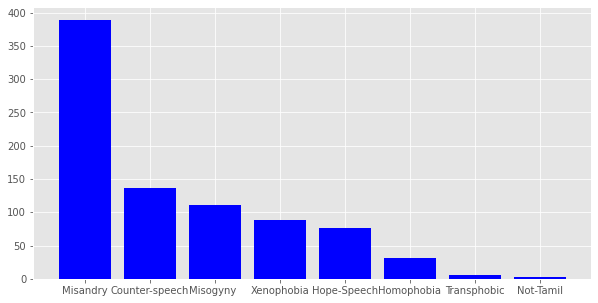

In [ ]:
from matplotlib import style
print("Train dataset graph")
plt.figure(figsize=(10,5))
style.use('ggplot')
plt.bar(['Misandry','Counter-speech','Misogyny ','Xenophobia','Hope-Speech','Homophobia','Transphobic','Not-Tamil'], height=[train['Category'].value_counts()['Misandry'], train['Category'].value_counts()['Counter-speech'],train['Category'].value_counts()['Misogyny'],train['Category'].value_counts()['Xenophobia'],train['Category'].value_counts()['Hope-Speech'],train['Category'].value_counts()['Homophobia'],train['Category'].value_counts()['Transphobic'],train['Category'].value_counts()['Not-Tamil']], color='b')
plt.show()

In [ ]:
test.Category.value_counts()

None-of-the-above    346
Misandry             104
Counter-speech        36
Xenophobia            29
Misogyny              24
Hope-Speech           11
Homophobia             8
Transphobic            2
Not-Tamil              1
Name: Category, dtype: int64

Test dataset graph


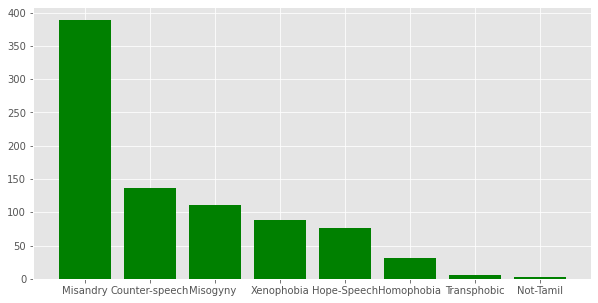

In [ ]:
from matplotlib import style
print("Test dataset graph")
plt.figure(figsize=(10,5))
style.use('ggplot')
plt.bar(['Misandry','Counter-speech','Misogyny ','Xenophobia','Hope-Speech','Homophobia','Transphobic','Not-Tamil'], height=[train['Category'].value_counts()['Misandry'], train['Category'].value_counts()['Counter-speech'],train['Category'].value_counts()['Misogyny'],train['Category'].value_counts()['Xenophobia'],train['Category'].value_counts()['Hope-Speech'],train['Category'].value_counts()['Homophobia'],train['Category'].value_counts()['Transphobic'],train['Category'].value_counts()['Not-Tamil']], color='g')
plt.show()

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                          u"\u2600-\u2B55"
                         u"\u200d"
                            u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                           "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)
def clean(text):
    remv_punc = [char for char in text.lower() if char not in string.punctuation]
    remv_punc_join = ''.join(remv_punc)

    return remv_punc_join

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Actual labels',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def removeDuplicates(s):
    chars = []
    prev = None
    prev1 = None
    i,j=0,0
    while i < len(s):
      count=0
      j=i
      while j<len(s):
        if (s[i] == s[j]):
          count+=1
        else:
          break
        j+=1
      if (count>=2):
        chars.append(s[i])
        chars.append(s[i])
        i+=count
      else:
        chars.append(s[i])
        i+=1;


    return ''.join(chars)

In [ ]:
"""train['text'] = train['text'].apply(clean)
train['text'] = train['text'].apply(remove_emoji)
train['text'] = train['text'].apply(removeDuplicates)

val['text'] = val['text'].apply(clean)
val['text'] = val['text'].apply(remove_emoji)
val['text'] = val['text'].apply(removeDuplicates)

test['text'] = test['text'].apply(clean)
test['text'] = test['text'].apply(remove_emoji)
test['text'] = test['text'].apply(removeDuplicates)"""


"train['text'] = train['text'].apply(clean)\ntrain['text'] = train['text'].apply(remove_emoji)\ntrain['text'] = train['text'].apply(removeDuplicates)\n\nval['text'] = val['text'].apply(clean)\nval['text'] = val['text'].apply(remove_emoji)\nval['text'] = val['text'].apply(removeDuplicates)\n\ntest['text'] = test['text'].apply(clean)\ntest['text'] = test['text'].apply(remove_emoji)\ntest['text'] = test['text'].apply(removeDuplicates)"

In [ ]:
train.head()

,Category,Text
0,Hope-Speech,உங்கள் பேச்சை எதிர்பார்த்தேன். நல்ல விளக்கம் ...
1,None-of-the-above,எச். ராசாவால் இராமருக்கே இழிவு. இவர் எல்லாம் ...
2,None-of-the-above,கல்யாணம்னு வரும்போது தான் சாதி முக்கியம் எங்க...
3,None-of-the-above,Tentu Kottai ஐயா நான் தமிழ் இந்து.
4,Homophobia,Tamil selvan அடே தேவடியாவுக்கு பிரந்தவனே பச்ச...


In [ ]:
val.head()

,Category,Text
0,None-of-the-above,Ada பாவிகளா அந்த மனுசன் சரியா தான் சொள்ளிருக்க...
1,Misogyny,இவங்களே குடும்பாங்களாம் அப்புறம் இவங்களே வரதட்...
2,Misandry,பொது மேடையில் பேச தகுதி இல்லாதவன் ராஜா
3,None-of-the-above,சீனிவாசன் மனித குலத்திற்க்கு கிடைத்த அரிய பொக்...
4,Xenophobia,கைபர் கணவாய் வழியாக வந்தீர்கள் நீ இந்தியன் இல்லை


In [ ]:
test.head()

,Category,Text
0,Counter-speech,தகுதிக்கு ஏற்றார் போல் பெண் அல்லது மாப்பிளை பா...
1,Counter-speech,கேவலமான சமஸ்கிருத கல்யாண மந்திரங்கள். நான் ஹிந...
2,Counter-speech,பிராமணர்களில் எத்தனையோ நல்லவர்கள் இருக்கிறார்க...
3,Counter-speech,youtube பாக்குற யாரும் vote போடா போறதில்லையோ ...
4,Counter-speech,வருண் அம்மா மட்டும் இல்ல. இங்கு பலர் பயப்படுவத...


In [ ]:
test.shape

(561, 2)

In [ ]:
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [ ]:
num_words = 20000
tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(train['Text'].tolist())
tokenizer.fit_on_texts(val['Text'].tolist())
tokenizer.fit_on_texts(test['Text'].tolist())

In [ ]:
test['Num_words_text'] = test['Text'].apply(lambda x:len(str(x).split()))

max_test_sentence_length  = test['Num_words_text'].max()

print('Test Max Sentence Length :'+str(max_test_sentence_length))

Test Max Sentence Length :86


In [ ]:
x_train = np.array( tokenizer.texts_to_sequences(train['Text']) )
x_valid = np.array( tokenizer.texts_to_sequences(val['Text']) )
x_test  = np.array( tokenizer.texts_to_sequences(test['Text']) )



x_train = pad_sequences(x_train, padding='post', maxlen=40)
x_valid = pad_sequences(x_valid, padding='post', maxlen=40)
x_test = pad_sequences(x_test, padding='post', maxlen=40)

print(x_train[0])

le = LabelEncoder()

train_labels = le.fit_transform(train['Category'])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print(train_labels)

valid_labels = le.transform(val['Category'])
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

test_labels = le.transform(test['Category'])
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))

list(le.classes_)


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

[  31  115 3638   24  380   79  430  942   94 3639 2103  221 1150  111
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
y_train=train['Category']
print(y_train[10:23])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[10:23])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:3])

10    None-of-the-above
11    None-of-the-above
12    None-of-the-above
13    None-of-the-above
14             Misandry
15    None-of-the-above
16    None-of-the-above
17    None-of-the-above
18       Counter-speech
19    None-of-the-above
20    None-of-the-above
21             Misandry
22    None-of-the-above
Name: Category, dtype: object
Text to number
[5 5 5 5 3 5 5 5 0 5 5 3 5]
Number to category
[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
max_features =20000
embedding_dim =128
sequence_length = 40
embed_dim = 128
lstm_out = 196
from keras.layers import GRU
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))

model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model.add(tf.keras.layers.LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))

model.add(tf.keras.layers.Dense(9, activation='softmax',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))




model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 128)           2560128   
                                                                 
 conv1d_1 (Conv1D)           (None, 40, 128)           49280     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 20, 128)          0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dense_1 (Dense)             (None, 9)                 1773      
                                                                 
Total params: 2,865,981
Trainable params: 2,865,981
Non-trainable params: 0
____________________________________________

In [ ]:
epochs =2
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs)

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning:

"`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



16/16 [==============================] - 8s 307ms/step - loss: 2.3531 - accuracy: 0.5618
Epoch 2/2
16/16 [==============================] - 5s 306ms/step - loss: 1.5707 - accuracy: 0.5808


In [ ]:

history.history

In [ ]:
accr = model.evaluate(x_test ,test_labels)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning:

"`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



18/18 [==============================] - 1s 26ms/step - loss: 1.3652 - accuracy: 0.6168
Test set
  Loss: 1.365
  Accuracy: 0.617


In [ ]:
print("Generate predictions for all samples")
predictions = model.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Generate predictions for all samples
[[0.06024186 0.01302313 0.03724986 ... 0.0031597  0.00304375 0.04652745]
 [0.08228315 0.02535902 0.05289665 ... 0.00955834 0.00869752 0.06749774]
 [0.12641056 0.05304607 0.08789558 ... 0.03388302 0.03159655 0.10041246]
 ...
 [0.05654014 0.01147876 0.03493656 ... 0.00252486 0.00248127 0.04307829]
 [0.05609216 0.0113101  0.03467289 ... 0.00245729 0.00242127 0.04267786]
 [0.06561888 0.01549616 0.0407057  ... 0.00426146 0.00401764 0.05154823]]


In [ ]:
test['pred_sentiment']= predict_results
test['pred_sentiment'] = np.where((test.pred_sentiment == '0'),'Misandry',test.pred_sentiment)
test['pred_sentiment'] = np.where((test.pred_sentiment == '1'),'Counter-speech',test.pred_sentiment)
test['pred_sentiment'] = np.where((test.pred_sentiment == '2'),'Misogyny ',test.pred_sentiment)
test['pred_sentiment'] = np.where((test.pred_sentiment == '3'),'Xenophobia',test.pred_sentiment)
test['pred_sentiment'] = np.where((test.pred_sentiment == '4'),'Hope-Speech',test.pred_sentiment)
test['pred_sentiment'] = np.where((test.pred_sentiment == '5'),'Homophobia',test.pred_sentiment)
test['pred_sentiment'] = np.where((test.pred_sentiment == '6'),'Transphobic',test.pred_sentiment)
test['pred_sentiment'] = np.where((test.pred_sentiment == '7'),'Not-Tamil',test.pred_sentiment)
test['pred_sentiment'] = np.where((test.pred_sentiment == '8'),'None-of-the-above',test.pred_sentiment)


In [ ]:
#predictions_NB= model.predict(xvalid_tfidf_ngram)

In [ ]:
labels = ['Misandry','Counter-speech','Misogyny ','Xenophobia','Hope-Speech','Homophobia','Transphobic','Not-Tamil','None-of-the-above']

print(classification_report(test['Category'].tolist(),test['pred_sentiment'].tolist(),labels=labels))



precision    recall  f1-score   support

         Misandry       0.15      0.35      0.15       104
   Counter-speech       0.26      0.07      0.06        26
        Misogyny        0.00      0.00      0.40         0
       Xenophobia       0.37      0.03      0.37        29
      Hope-Speech       0.10      0.00      0.56        11
       Homophobia       0.01      1.00      0.07         8
      Transphobic       0.00      0.05      0.10         2
        Not-Tamil       0.32      0.60      0.37         1
None-of-the-above       0.03      0.04      0.54       346

        micro avg       0.31      0.21      0.27       537
        macro avg       0.20      0.41      0.30       537
     weighted avg       0.49      0.53      0.50       537


In [ ]:
from mlxtend.evaluate import confusion_matrix

cm = confusion_matrix(y_target=test['Category'],
                      y_predicted=test['pred_sentiment'],
                      binary=False)
cm

array([[  0,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   8,   0,   0,   0,   0,   0,   0,   0],
       [  0,  11,   0,   0,   0,   0,   0,   0,   0],
       [  0, 104,   0,   0,   0,   0,   0,   0,   0],
       [  0,  24,   0,   0,   0,   0,   0,   0,   0],
       [  0, 346,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,  29,   0,   0,   0,   0,   0,   0,   0]])